Libraries

In [28]:
import tensorflow as tf ; import numpy as np ; import matplotlib.pyplot as plt ; import pandas as pd
from tensorflow import keras ; from tqdm import tqdm ; from keras.preprocessing.image import load_img
import os 

In [29]:
Train_directory = "../Emotions_Data/train"
Test_directory = "../Emotions_Data/test"

Making Dataframe

In [30]:
def creat_df(dir):

    Images_count = []
    Images = []
    Labels = []
    num = 1000
    for DirectoryName in os.listdir(dir):
        for ImageName in os.listdir(os.path.join(dir , DirectoryName)):
            Images_count.append(ImageName)
        if len(Images_count) >= num:
            for i in range(1 , num):
                Images.append(os.path.join(dir + "/" + DirectoryName + f"/im{i}.png"))
                Labels.append(DirectoryName)
        
        else:
            for i in range(1 , len(Images_count)):
                    Images.append(os.path.join(dir + "/" + DirectoryName + f"/im{i}.png"))
                    Labels.append(DirectoryName)
        print(f"{dir.split("../Emotions_Data/")[1]}: {DirectoryName} Added.")
        Images_count.clear()

    return(Images , Labels)

In [31]:
train = pd.DataFrame()
train["Images"] , train["Labels"] = creat_df(Train_directory)
test = pd.DataFrame()
test["Images"] , test["Labels"] = creat_df(Test_directory)

train: angry Added.
train: disgusted Added.
train: fearful Added.
train: happy Added.
train: neutral Added.
train: sad Added.
train: surprised Added.
test: angry Added.
test: disgusted Added.
test: fearful Added.
test: happy Added.
test: neutral Added.
test: sad Added.
test: surprised Added.


In [32]:
len(set(train["Labels"])) # Number of labels

7

In [33]:
train.shape , test.shape

((6429, 2), (5893, 2))

In [34]:
train.head()

,Images,Labels
0,../Emotions_Data/train/angry/im1.png,angry
1,../Emotions_Data/train/angry/im2.png,angry
2,../Emotions_Data/train/angry/im3.png,angry
3,../Emotions_Data/train/angry/im4.png,angry
4,../Emotions_Data/train/angry/im5.png,angry


Extracting data

In [35]:
def Extracting_Features(images):

    Features = []
    for image in tqdm(images):
        img = load_img(image , color_mode="grayscale") # Image into PIL format
        img = np.array(img)
        Features.append(img)
    Features = np.array(Features) # Making batch
    Features = Features.reshape(len(Features) , 48,48,1) # channel = 1 and image size = 48*48
    return Features

In [36]:
train_features = Extracting_Features(train["Images"])
test_features = Extracting_Features(test["Images"])

100%|██████████| 5893/5893 [00:01<00:00, 4011.81it/s]


Normalization

In [37]:
x_train = train_features/255.0
x_test = test_features/255.0

Preprocessing

In [38]:
from keras.utils import  to_categorical
from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()
Encoder.fit(train["Labels"])

y_train = Encoder.transform(train["Labels"])
y_test = Encoder.transform(test["Labels"])

y_train = to_categorical(y_train.reshape(-1 , 1) , 7)
y_test = to_categorical(y_test.reshape(-1 , 1) , 7)

Model

In [49]:
model = keras.Sequential()
model.add(keras.layers.Input(shape = (48 , 48 , 1)))
model.add(keras.layers.Conv2D(32 , kernel_size = (3 , 3) , strides = (1 , 1) , padding = "valid" , activation = "relu"))
model.add(keras.layers.MaxPool2D(pool_size = (2 , 2)))
model.add(keras.layers.Conv2D(64 , kernel_size = (3 , 3) , strides = (1 , 1) , padding = "valid" , activation = "relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(pool_size = (2 , 2)))
model.add(keras.layers.Conv2D(128 , kernel_size = (3 , 3) , strides = (1 , 1) , padding = "valid" , activation = "relu"))
model.add(keras.layers.MaxPool2D(pool_size = (2 , 2)))
model.add(keras.layers.Conv2D(128 , kernel_size = (3 , 3) , strides = (1 , 1) , padding = "valid" , activation = "relu"))
model.add(keras.layers.MaxPool2D(pool_size = (2 , 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units = 512 , activation = "relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units = 7 , activation = "softmax"))

model.compile(optimizer = "adam" , loss = tf.losses.categorical_crossentropy , metrics = ["accuracy"])

In [50]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 2, 2, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 310,151 (1.18 MB)

 Trainable params: 310,023 (1.18 MB)

 Non-trainable params: 128 (512.00 B)

Train

In [51]:
hist = model.fit(x = x_train , y = y_train , epochs = 15 , batch_size = 256 , validation_data = (x_test , y_test))

Epoch 1/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.1791 - loss: 1.9354 - val_accuracy: 0.1437 - val_loss: 1.9343
Epoch 2/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.2326 - loss: 1.8660 - val_accuracy: 0.1722 - val_loss: 1.9365
Epoch 3/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.2929 - loss: 1.7618 - val_accuracy: 0.1785 - val_loss: 1.9283
Epoch 4/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.3638 - loss: 1.6223 - val_accuracy: 0.2656 - val_loss: 1.9151
Epoch 5/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.4113 - loss: 1.5377 - val_accuracy: 0.2033 - val_loss: 1.8894
Epoch 6/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.4387 - loss: 1.4612 - val_accuracy: 0.3375 - val_loss: 1.8580
Epoch 7/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.5041 - loss: 1.3383 - val_accuracy: 0.2360 - val_loss: 1.8544
Epoch 8/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.5283 - loss: 1.2455 - val_accuracy: 0.

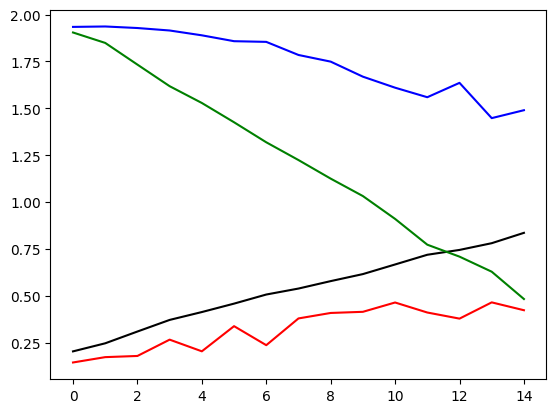

In [52]:
plt.plot(hist.history["accuracy"] , color = "black" , label = "accuracy")
plt.plot(hist.history["val_accuracy"] , color = "red" , label = "val_accuracy")
plt.plot(hist.history["loss"] , color = "green" , label = "loss")
plt.plot(hist.history["val_loss"] , color = "blue" , label = "val_loss")

Saving

In [53]:
json = model.to_json()
with open("EmotionalFaces.json" , "w") as file:
    file.write(json)
model.save("EmotionalFaces.h5")